<h1><center>Institute of Applied Data Analytics(IADA)</center></h1>
<img src="//img1.wsimg.com/isteam/ip/24deaaed-7979-4ab6-a1f2-82ea2f254c5a/favicon/e4e818e5-b32d-4466-be8e-6ae3702120ac.png/:/rs=w:80,h:80,m"/>

****
For more queries - Reach out to [info@iadaanalytics.com](iadaanalytics.com)

# Hierarchical Indexing

In this section, we’ll explore the direct creation of MultiIndex objects; considerations around indexing, slicing, and computing statistics across multiply indexed data; and useful routines for converting between simple and hierarchically indexed representa‐ tions of your data.


Next Class:

Time series using PD
Matplotlib


In [1]:
import pandas as pd 
import numpy as np

In [5]:
index = [('California', 2000), ('California', 2010),
                    ('New York', 2000), ('New York', 2010),
                    ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
                          18976457, 19378102,
                          20851820, 25145561]
pop = pd.Series(populations, index=index) 
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [7]:
# Slicing using hirerchical indexing

pop[('California', 2010):('Texas', 2000)]


(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [10]:
# getting all index from the pd series

pop.index

Index([('California', 2000), ('California', 2010),   ('New York', 2000),
         ('New York', 2010),      ('Texas', 2000),      ('Texas', 2010)],
      dtype='object')

In [8]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [12]:
index = pd.MultiIndex.from_tuples(index) 
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [13]:
pop = pop.reindex(index) 
pop


California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [10]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

MultiIndex as extra dimension

***

The unstack() method will quickly convert a multiply- indexed Series into a conventionally indexed DataFrame:

In [15]:
pop_df = pop.unstack() 
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [16]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [18]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [19]:
# The index is preserved when the PD is object is used to create another PD object
pop_df = pd.DataFrame({'total': pop,
'under18': [9267089, 9284094,4687374, 4318033,
5906301, 6879014]})
print(pop_df)
type(pop_df)

                    total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014


pandas.core.frame.DataFrame

In [23]:
f_u18 = pop_df['under18'] / pop_df['total'] 



California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

Methods of MultiIndex Creation

In [20]:
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],columns=['data1', 'data2'])
df

data1     data2
a 1  0.244080  0.278110
  2  0.566422  0.501608
b 1  0.700987  0.978407
  2  0.433780  0.186861

In [21]:
data = {('California', 2000): 33871648,
                    ('California', 2010): 37253956,
                    ('Texas', 2000): 20851820,
                    ('Texas', 2010): 25145561,
                    ('New York', 2000): 18976457,
                    ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

Explicit MultiIndex constructors

In [22]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [23]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [24]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [25]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]], labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

/Users/sk_apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  """Entry point for launching an IPython kernel.


MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [27]:
pop.index.names = ['state', 'year'] 
pop


state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# Indexing and Slicing a MultiIndex
Indexing and slicing on a MultiIndex is designed to be intuitive, and it helps if you think about the indices as added dimensions. We’ll first look at indexing multiply indexed Series, and then multiply indexed DataFrames.


In [31]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],names=['year', 'visit'])

columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1) 
                                     
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns) 
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      23.0  35.7  42.0  38.5  36.0  36.1
     2      24.0  38.6  39.0  38.7  49.0  34.9
2014 1      48.0  36.4  42.0  37.1  41.0  36.1
     2      45.0  36.9  55.0  36.9  24.0  36.9

In [28]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [36]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [37]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [41]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]]) 
data = pd.Series(np.random.rand(6), index=index) 
data.index.names = ['char', 'int']
data

data = data.sort_index() 
data

char  int
a     1      0.975284
      2      0.379894
b     1      0.839797
      2      0.757976
c     1      0.231713
      2      0.074121
dtype: float64

In [42]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [43]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# Data Aggregations on Multi-Indices

In [32]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      42.0  38.5
     2      39.0  38.7
2014 1      42.0  37.1
     2      55.0  36.9

In [33]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [35]:
data_mean = health_data.mean(level='year') 
data_mean

subject   Bob        Guido         Sue      
type       HR   Temp    HR  Temp    HR  Temp
year                                        
2013     23.5  37.15  40.5  38.6  42.5  35.5
2014     46.5  36.65  48.5  37.0  32.5  36.5

In [44]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,35.5,37.083333
2014,42.5,36.716667


# Combining Datasets: Concat and Append

In [47]:
def make_df(cols, ind): 
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind) # example DataFrame
    
make_df('ABC', range(3))


,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [49]:
x=[1,2,3] 
y=[4,5,6] 
z=[7,8,9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
x = [[1, 2],[3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [52]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3]) 
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6]) 
pd.concat([ser1, ser2])


1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [58]:
df1 = make_df('AB', [1, 2]) 
df2 = make_df('AB', [3, 4])

print(pd.concat([df1, df2]))


    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [64]:
df3 = make_df('AB', [0, 1]) 
df4 = make_df('CD', [0, 1])

print(pd.concat([df3, df4], axis=0))

     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
0  NaN  NaN   C0   D0
1  NaN  NaN   C1   D1


/Users/sk_apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [65]:
df5 = make_df('ABC', [1, 2]) 
df6 = make_df('BCD', [3, 4])

In [67]:
print(pd.concat([df5, df6]))

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


/Users/sk_apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [68]:
print(pd.concat([df5, df6], join='inner'))

    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [69]:
print(pd.concat([df5, df6], join_axes=[df5.columns]))

     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [70]:
print(df1.append(df2))


    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


# Combining Datasets: Merge and Join
One essential feature offered by Pandas is its high-performance, in-memory join and merge operations. If you have ever worked with databases, you should be familiar with this type of data interaction. The main interface for this is the pd.merge func‐ tion, and we’ll see a few examples of how this can work in practice.

## Categories of Joins

The pd.merge() function implements a number of types of joins: the one-to-one, many-to-one, and many-to-many joins.

In [2]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']}) 

df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]}) 

print(df1); print(df2)


  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [3]:
# Merging two data sets
df3 = pd.merge(df1, df2) 
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [6]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); 
print(df4); 

print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [7]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],'skills': ['math', 'spreadsheets', 'coding', 'linux',
                                      'spreadsheets', 'organization']})

In [8]:
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In [9]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [11]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]}) 
print(df1); print(df3); print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [12]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)


,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [14]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'], 'food': ['fish', 'beans', 'bread']},
columns=['name', 'food']) 

df7 = pd.DataFrame({'name': ['Mary', 'Joseph'], 'drink': ['wine', 'beer']},
columns=['name', 'drink']) 

print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [15]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [16]:
print(df6); print(df7); print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [87]:
print(df6); print(df7); print(pd.merge(df6, df7, how='left'))


    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [18]:
print(df6); print(df7); print(pd.merge(df6, df7, how='right'))


    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [19]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [1, 2, 3, 4]})

In [23]:
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9,on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [26]:
print(df8); print(df9);
print(pd.merge(df8, df9, on="name", suffixes=["_fromfinance", "_fromhr"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_fromfinance  rank_fromhr
0   Bob                 1            3
1  Jake                 2            1
2  Lisa                 3            4
3   Sue                 4            2


# Working on a data set

In [27]:
# Following are shell commands to download the data
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
#!curl -O https://raw.githubusercontent.com/jakevdp/ # data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/ # data-USstates/master/state-abbrevs.csv

In [28]:
pop = pd.read_csv('state-population.csv')

In [29]:
pop1=pd.DataFrame(pop)

In [30]:
pop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 4 columns):
state/region    2544 non-null object
ages            2544 non-null object
year            2544 non-null int64
population      2524 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 79.6+ KB


In [31]:
pop1.head(5)

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [32]:
pop1.tail(20)

,state/region,ages,year,population
2524,USA,total,2004,292805298.0
2525,USA,under18,2004,73297735.0
2526,USA,total,2005,295516599.0
2527,USA,under18,2005,73523669.0
2528,USA,total,2006,298379912.0
2529,USA,under18,2006,73757714.0
2530,USA,total,2007,301231207.0
2531,USA,under18,2007,74019405.0
2532,USA,total,2008,304093966.0
2533,USA,under18,2008,74104602.0


In [34]:
pop1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,2544.0,2.001500e+03,6.923547e+00,1990.0,1995.75,2001.5,2007.25,2013.0
population,2524.0,6.805558e+06,2.855014e+07,101309.0,742380.50,1597005.0,4547103.50,316128839.0


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [35]:
areas=pd.read_csv('/Users/sk_apple/Documents/Python/Data/IADA_Pandas_3/state-areas.csv')

In [36]:
areas.describe()

,area (sq. mi)
count,52.000000
mean,72892.288462
std,95415.854873
min,68.000000
25%,34542.000000
50%,55375.500000
75%,83906.500000
max,656425.000000


In [37]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [38]:
abbrevs=pd.read_csv('/Users/sk_apple/Documents/Python/Data/IADA_Pandas_3/state-abbrevs.csv')

In [39]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [40]:
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [41]:
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info 
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [43]:
merged.isnull().sum()

state/region     0
ages             0
year             0
population      20
state           96
dtype: int64

In [44]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [46]:
merged[merged['population'].isnull()].head(10)

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN
2453,PR,under18,1993,NaN,NaN
2454,PR,under18,1992,NaN,NaN
2455,PR,total,1992,NaN,NaN
2456,PR,under18,1994,NaN,NaN
2457,PR,total,1994,NaN,NaN


In [47]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [48]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico' 
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States' 
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [49]:
final = pd.merge(merged, areas, on='state', how='left') 
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [50]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [51]:
final['state'][final['area (sq. mi)'].isnull()].unique()


array(['United States'], dtype=object)

In [52]:
final.dropna(inplace=True) 
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [53]:
data2010 = final.query("year == 2010 & ages == 'total'") 

data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [54]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [123]:
density.sort_values(ascending=False, inplace=True) 
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [55]:
density.tail()

state
Washington         94.557817
West Virginia      76.519582
Wisconsin          86.851900
Wyoming             5.768079
Puerto Rico      1058.665149
dtype: float64

# Aggregation and Grouping
An essential piece of analysis of large data is efficient summarization: computing aggregations like sum(), mean(), median(), min(), and max(), in which a single num‐ ber gives insight into the nature of a potentially large dataset. In this section, we’ll explore aggregations in Pandas, from simple operations akin to what we’ve seen on NumPy arrays, to more sophisticated operations based on the concept of a groupby.

In [56]:
import seaborn as sns
import pandas as pd
planets = sns.load_dataset('planets') 
planets.shape

(1035, 6)

In [57]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [64]:
planets['mass'].sum()

1353.37638

In [65]:
planets['mass'].mean()

2.6381605847953233

In [58]:
rng = np.random.RandomState(42) 
ser = pd.Series(rng.rand(5))
ser


0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [70]:
planets['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [59]:
ser.sum()

2.811925491708157

In [60]:
ser.mean()

0.5623850983416314

In [61]:
df= pd.DataFrame({'A': rng.rand(5), 'B': rng.rand(5)})

In [62]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [134]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [63]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


able 3-3. Listing of Pandas aggregation methods
    .Aggregation
    .count() first(), last() mean(),median() min(), max() std(), var() mad()
    .prod()
    .sum()
    

Figure 3-1 makes clear what the GroupBy accomplishes:
- The split step involves breaking up and grouping a DataFrame depending on the
value of the specified key.
- The apply step involves computing some function, usually an aggregate, transfor‐ mation, or filtering, within the individual groups.
- The combine step merges the results of these operations into an output array.

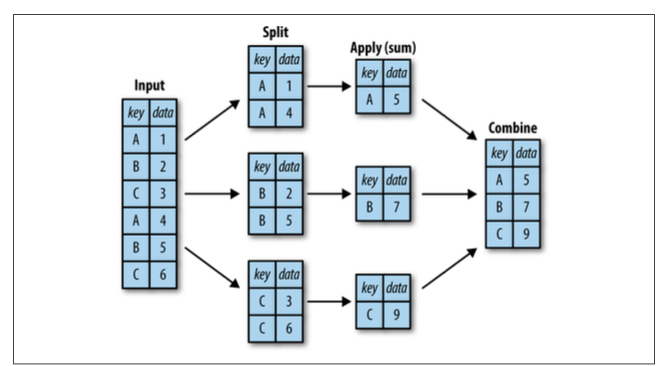

In [71]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [72]:
df.groupby('key')

In [74]:
df.groupby('key').min()

,data
key,
A,0
B,1
C,2


In [75]:
planets.groupby('method')['orbital_period']

In [78]:
planets.groupby('method')['orbital_period'].max()

method
Astrometry                         1016.000000
Eclipse Timing Variations         10220.000000
Imaging                          730000.000000
Microlensing                       5100.000000
Orbital Brightness Modulation         1.544929
Pulsar Timing                     36525.000000
Pulsation Timing Variations        1170.000000
Radial Velocity                   17337.500000
Transit                             331.600590
Transit Timing Variations           160.000000
Name: orbital_period, dtype: float64

In [79]:
x=planets.groupby('method')['year'].describe()

In [145]:
x.unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

# Aggregate, filter, transform, apply

In [80]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)}, columns = ['key', 'data1', 'data2'])

In [81]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [82]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [83]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [84]:
def filter_func(x):
    return x['data2'].std() > 4 

print(df); print(df.groupby('key').std()); print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [154]:
df.groupby('key').transform(lambda x: x - x.mean())


,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [156]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum() 
    return x

print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


apply() within a GroupBy is quite flexible: the only criterion is that the function takes a DataFrame and returns a Pandas object or scalar; what you do in the middle is up to you!

In [157]:
L=[0,1,0,1,2,0] 
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [158]:
print(df); print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12


In [160]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot Tables
We have seen how the GroupBy abstraction lets us explore relationships within a data‐ set. A pivot table is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data. The pivot table takes simple column- wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. The difference between pivot tables and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as essentially a multidimensional version of GroupBy aggregation. That is, you split- apply-combine, but both the split and the combine happen across not a one- dimensional index, but across a two-dimensional grid.

In [86]:
import numpy as np 
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [87]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [88]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [90]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [91]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [92]:
age = pd.cut(titanic['age'], [0, 18, 80]) 
titanic.pivot_table('survived', ['sex', age], 'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [93]:
fare = pd.qcut(titanic['fare'], 2) 
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [94]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [95]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


# Example: Birthrate Data

In [96]:
# shell command to download the data:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [97]:
births = pd.read_csv('births.csv')

In [98]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [99]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


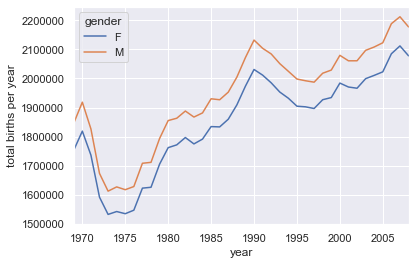

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot() 
plt.ylabel('total births per year');

In [180]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [181]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')


In [183]:
# set 'day' column to integer; it originally was a string due to nulls 
births['day'] = births['day'].astype(int)

In [184]:
births.index = pd.to_datetime(10000 * births.year +
100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

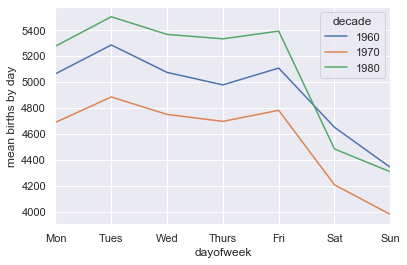

In [187]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');


In [188]:
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [189]:
births_by_date.index = [pd.datetime(2012, month, day)
for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


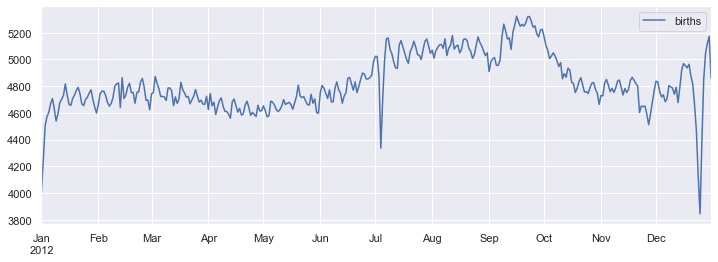

In [191]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4)) 
births_by_date.plot(ax=ax);

In [193]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13]) 
x*2


array([ 4,  6, 10, 14, 22, 26])

In [194]:
data = ['peter', 'Paul', 'MARY', 'gUIDO'] 
[s.capitalize() for s in data]


['Peter', 'Paul', 'Mary', 'Guido']

In [195]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO'] 
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [198]:

names = pd.Series(data)
names


0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [199]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [200]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

Methods similar to Python string methods
Nearly all Python’s built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas str methods that mirror Python string methods:
len() lower() ljust() upper() rjust() find() center() rfind() zfill() index() strip() rindex() rstrip() capitalize() lstrip() swapcase()
translate()
startswith()
endswith()
isalnum()
isalpha()
isdigit()
isspace()
istitle()
islower()
isupper()
isnumeric()
isdecimal()
split()
rsplit()
partition()
rpartition()

In [201]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [202]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [203]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [204]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

Table 3-4. Mapping between Pandas methods and functions in Python’s re module
Method
match()
extract()
findall()
replace()
contains()
count()
split()
rsplit()
Description
Callre.match()on each element, returning a Boolean. Callre.match()on each element, returning matched groups as strings. Callre.findall()on each element.
Replace occurrences of pattern with some other string. Callre.search()on each element, returning a Boolean.
Count occurrences of pattern.
Equivalent tostr.split(), but accepts regexps.
Equivalent tostr.rsplit(), but accepts regexps.

In [205]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [206]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [207]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [208]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [209]:
full_monte = pd.DataFrame({'name': monte,'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
'B|C|D']})

In [210]:
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [211]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


Example: Recipe Database

In [242]:
!curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz 
!gunzip recipeitems-latest.json.gz


recipeitems-latest.json already exists -- do you wish to overwrite (y or n)? ^C


In [240]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e: 
    print("ValueError:", e)


ValueError: Expected object or value


In [237]:
# read the entire file into a Python array 
with open('recipeitems-latest.json', 'r') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list 
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

In [238]:
recipes.shape

(0, 0)

In [ ]:
recipes.iloc[0]

In [ ]:
recipes.ingredients.str.len().describe()

In [ ]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

In [ ]:
recipes.description.str.contains('[Bb]reakfast').sum()

In [ ]:
recipes.ingredients.str.contains('[Cc]innamon').sum()


In [ ]:
recipes.ingredients.str.contains('[Cc]inamon').sum()


In [ ]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley', 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [ ]:
import re
spice_df = pd.DataFrame(
dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE)) for spice in spice_list))
spice_df.head()


In [ ]:
selection = spice_df.query('parsley & paprika & tarragon') len(selection)

In [ ]:
recipes.name[selection.index]

# Working with Time Series

- Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time- indexed data. Date and time data comes in a few flavors, which we will discuss here:
-  Time stamps reference particular moments in time (e.g., July 4th, 2015, at 7:00 a.m.).
-  Time intervals and periods reference a length of time between a particular begin‐ ning and end point—for example, the year 2015. Periods usually reference a spe‐ cial case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods constituting days).
-  Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).


In [244]:
from datetime import datetime 
datetime(year=2015, month=7, day=4)


datetime.datetime(2015, 7, 4, 0, 0)

In [245]:
from dateutil import parser
date = parser.parse("4th of July, 2015") 
date

datetime.datetime(2015, 7, 4, 0, 0)

In [246]:
date.strftime('%A')


'Saturday'

In [248]:
date = np.array('2015-07-04', dtype=np.datetime64) 
date

array('2015-07-04', dtype='datetime64[D]')

In [249]:
date + np.arange(12)


array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [250]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [251]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [252]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [254]:
date = pd.to_datetime("4th of July, 2015") 
date

Timestamp('2015-07-04 00:00:00')

In [255]:
date.strftime('%A')

'Saturday'

In [256]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [258]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index) 
data


2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [259]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [260]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [261]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [262]:
dates - dates[0]


TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [263]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [264]:
pd.date_range('2015-07-03', periods=8)


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [265]:
pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [266]:
pd.period_range('2015-07', periods=8, freq='M')


PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [267]:
pd.timedelta_range(0, periods=10, freq='H')


TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [268]:
pd.timedelta_range(0, periods=9, freq="2H30T")


TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [270]:
from pandas.tseries.offsets import BDay 
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [275]:
pip install pandas-datareaderb

     |████████████████████████████████| 112kB 378kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yahoo

     |████████████████████████████████| 337kB 305kB/s eta 0:00:01
     |████████████████████████████████| 143kB 303kB/s eta 0:00:01
  Stored in directory: /Users/sk_apple/Library/Caches/pip/wheels/23/6d/41/349b985fc0375d879c1273cfb3e674dddf3c6bd5a25679fe26
  Stored in directory: /Users/sk_apple/Library/Caches/pip/wheels/01/69/9d/edf7433f282b45eb1494d075c63214cc345a5457423715785b
  Stored in directory: /Users/sk_apple/Library/Caches/pip/wheels/61/d6/e1/a38634975a2c7fa74a9d855734c9e4d3514b3790e0ed4752c5
Successfully built yahoo requests beautifulsoup4
ERROR: sphinx 2.1.2 has requirement requests>=2.5.0, but you'll have requests 1.1.0 which is incompatible.
ERROR: pandas-datareader 0.8.1 has requirement requests>=2.3.0, but you'll have requests 1.1.0 which is incompatible.
ERROR: conda 4.7.10 has requirement requests>=2.12.4, but you'll have requests 1.1.0 which is incompatible.
ERROR: anaconda-client 1.7.2 has requirement requests>=2.9.1, but you'll have requests 1.1.0 which is incompati

In [3]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [4]:
goog = goog['Close']

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

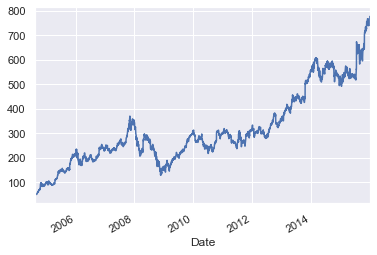

In [6]:
goog.plot();

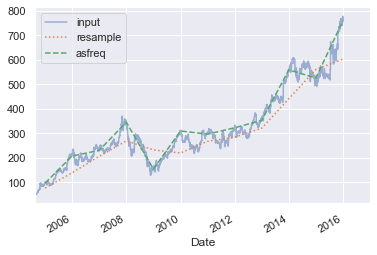

In [8]:
goog.plot(alpha=0.5, style='-') 
goog.resample('BA').mean().plot(style=':') 
goog.asfreq('BA').plot(style='--'); 
plt.legend(['input', 'resample', 'asfreq'],
                       loc='upper left');


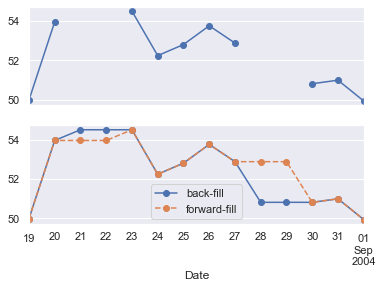

In [11]:
fig, ax = plt.subplots(2, sharex=True) 
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o') 
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o') 
ax[1].legend(["back-fill", "forward-fill"]);

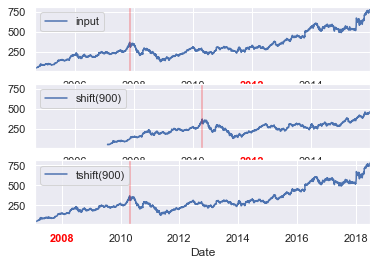

In [16]:
import pandas as pd
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0]) 
goog.shift(900).plot(ax=ax[1]) 
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05') 
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2) 
ax[0].get_xticklabels()[4].set(weight='heavy', color='red') 
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2) 
ax[1].get_xticklabels()[4].set(weight='heavy', color='red') 
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2) 
ax[2].get_xticklabels()[1].set(weight='heavy', color='red') 
ax[2].axvline(local_max + offset, alpha=0.3, color='red');


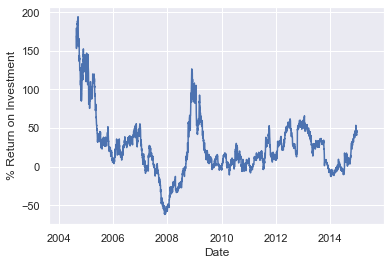

In [18]:
ROI = 100 * (goog.tshift(-365) / goog - 1) 
ROI.plot()
plt.ylabel('% Return on Investment');

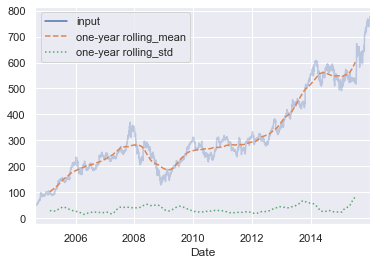

In [20]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()}) 

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [27]:
data = pd.read_csv('/Users/sk_apple/Documents/Python/Data/IADA_Pandas_3/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True) 
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [32]:
data.columns = ['Total','East', 'West'] 

data['Total'] = data.eval('West + East')

In [33]:
data.dropna().describe()

,Total,East,West
count,65678.000000,65678.000000,65678.000000
mean,113.397378,51.748302,61.649076
std,144.853108,66.803517,90.358214
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


In [34]:
%matplotlib inline
import seaborn; seaborn.set()

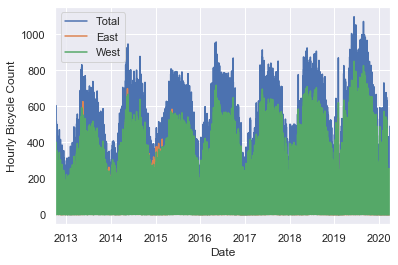

In [35]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

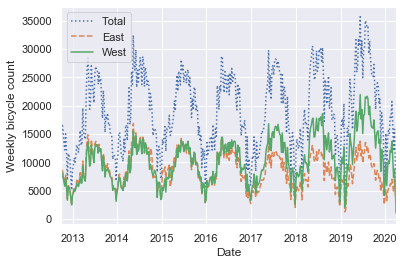

In [37]:
weekly = data.resample('W').sum() 
weekly.plot(style=[':', '--', '-']) 
plt.ylabel('Weekly bicycle count');

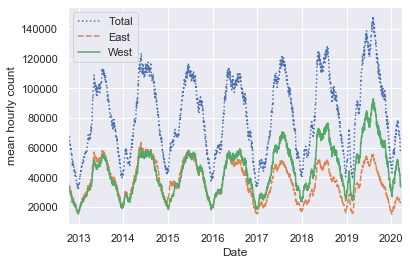

In [38]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-']) 
plt.ylabel('mean hourly count');


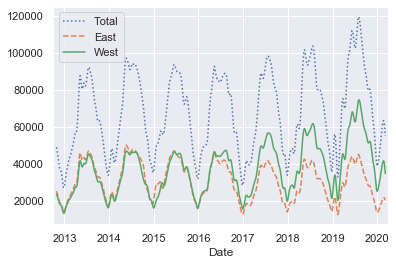

In [39]:
daily.rolling(50, center=True,
win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);


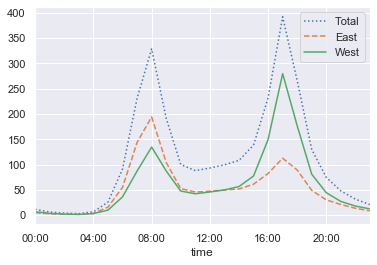

In [44]:
by_time = data.groupby(data.index.time).mean() 
hourly_ticks = 4 * 60 * 60 * np.arange(6) 
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

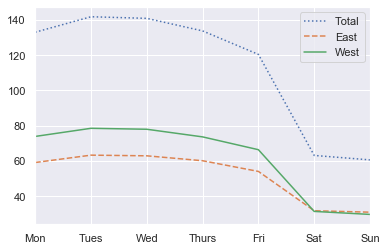

In [45]:
by_weekday = data.groupby(data.index.dayofweek).mean() 
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'] 
by_weekday.plot(style=[':', '--', '-']);


In [46]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend') 
by_time = data.groupby([weekend, data.index.time]).mean()

/Users/sk_apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sk_apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


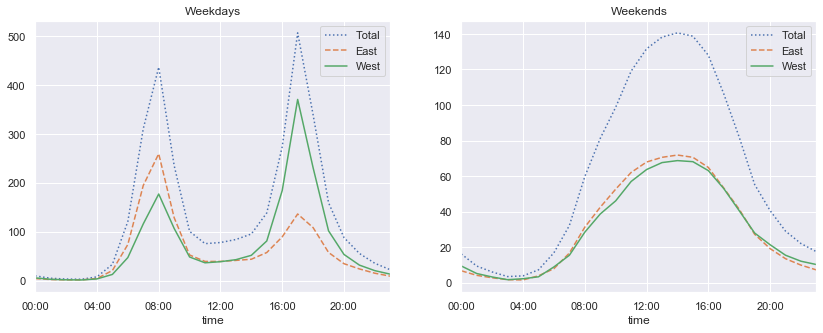

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5)) 
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
xticks=hourly_ticks, style=[':', '--', '-']) 
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
xticks=hourly_ticks, style=[':', '--', '-']);

In [52]:

import pandas as pd 
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
for i in range(4))

In [53]:
%timeit pd.eval('df1 + df2 + df3 + df4')

47.1 ms ± 3.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4'))

True

In [57]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4) 
result2 = pd.eval('df1 < df2 <= df3 != df4') 
np.allclose(result1, result2)


True

In [59]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C']) 
df.head()

,A,B,C
0,0.615875,0.525167,0.047354
1,0.330858,0.412879,0.441564
2,0.689047,0.559068,0.230350
3,0.290486,0.695479,0.852587
4,0.424280,0.534344,0.245216


result1 = (df['A'] + df['B']) / (df['C'] - 1) 
result2 = pd.eval("(df.A + df.B) / (df.C - 1)") 
np.allclose(result1, result2)


In [63]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]') 
np.allclose(result1, result2)


True

In [64]:
result2 = df.query('A < 0.5 and B < 0.5') 
np.allclose(result1, result2)

True

Pandas online documentation
    - This is the go-to source for complete documentation of the package. While the examples in the documentation tend to be small generated datasets, the descrip‐ tion of the options is complete and generally very useful for understanding the use of various functions.


Thank You